<hr style = "border: none; border-top: 20px solid #00722A; margin: -12px;">

# <span style = "font-family: Microsoft Sans Serif; color: black; text-shadow: 0 0 0px black;"> A Wealth of Data: Mathematical Modelling of Online Product Offerings via VADER Lexicon-Based Natural Language Processing and ARIMA Time-Series Analysis </span>

**by** <span style="color: #00722A; font-style: bold;"> **NORIE NEIL ACOSTA** </span>

<span style = "display: flex; align-items: center; margin-top: -23px; margin-left: 175px;">
    <a href = "mailto:ann1577@dlsud.edu.ph" title = "Email: ann1577@dlsud.edu.ph"> <img src = "Picture1.png" alt = "Image 1" style = "width: 25px; height: 25px; margin-right: 5px;"> </a>
    <a href = "tel:09673581501" title = "Phone: 09673581501"> <img src = "Picture2.png" alt = "Image 2" style = "width: 25px; height: 25px; margin-right: 5px;"> </a>
    <a href = "https://www.linkedin.com/in/norzeelein" title = "LinkedIn: https://www.linkedin.com/in/norzeelein"> <img src = "Picture3.png" alt = "Image 3" style = "width: 25px; height: 25px; margin-right: 5px;"> </a>
    <a href = "https://github.com/norzeelein" title = "GitHub: https://github.com/norzeelein"> <img src = "Picture4.png" alt = "Image 4" style = "width: 25px; height: 25px; margin-right: 5px;"> </a>
    <a href = "https://www.facebook.com/norzeelein" title = "Facebook: https://www.facebook.com/norzeelein"> <img src = "Picture5.png" alt = "Image 5" style = "width: 25px; height: 25px; margin-right: 5px;"> </a>
    <a href = "https://www.instagram.com/norzeelein" title = "Instagram: https://www.instagram.com/norzeelein"> <img src = "Picture6.png" alt = "Image 6" style = "width: 25px; height: 25px; margin-right: 5px;"> </a>
    <a href = "https://twitter.com/norzeelein" title = "Twitter: https://twitter.com/norzeelein"> <img src = "Picture7.png" alt = "Image 7" style = "width: 25px; height: 25px; margin-right: 5px;"> </a>
</span>

<hr style = "border: none; border-top: 5px solid #00722A; margin: 10px 0;">


<div class = "alert alert-success"> <span style = "font-family:Franklin Gothic Heavy"> 
    IMPORTING PYTHON LIBRARIES </div>

In [236]:
# IMPORTING PYTHON LIBRARIES
import nltk
import warnings
import wordcloud
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from nrclex import NRCLex
from matplotlib import pyplot
from tqdm.notebook import tqdm
from collections import Counter
from pmdarima import auto_arima
from wordcloud import WordCloud, STOPWORDS
from statsmodels.tsa.arima.model import ARIMA
from matplotlib.collections import PolyCollection
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.model_selection import train_test_split
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.metrics import mean_absolute_percentage_error
%matplotlib inline

In [2]:
# BABY PACIFIER DATA FRAME
BabyPacifier = pd.read_csv("BabyPacifier.csv", encoding = "latin-1")
BabyPacifier.index = BabyPacifier.index + 1
BabyPacifier.head()

,MARKET PLACE,CUSTOMER ID,REVIEW ID,PRODUCT ID,PRODUCT PARENT,PRODUCT TITLE,PRODUCT CATEGORY,STAR RATING,HELPFUL VOTES,TOTAL VOTES,VINE,VERIFIED PURCHASE,REVIEW HEADLINE,REVIEW BODY,REVIEW DATE
1,US,40626522,R1A3ZUBR8TSAKY,B00793CZAE,572944212,"mary meyer wubbanub plush pacifier, lamb",Baby,5,0,0,N,Y,Love this!,Perfect match for the Gund Huggybuddy I bought...,2015/08/31
2,US,16290022,RLJNYBK4FGBYX,B003PCYMP4,911821018,wubbanub lamb infant pacifier,Baby,5,0,0,N,Y,Love ð,My little girl love this paci contraption!,2015/08/31
3,US,10216509,R26QCW75C4JDOK,B003CK3LDI,392768822,wubbanub infant pacifier - giraffe,Baby,5,0,0,N,Y,Five Stars,My son loves this one and will only sleep if h...,2015/08/31
4,US,114040,R2E7N0TVLUHUDR,B003CK3LDI,392768822,wubbanub infant pacifier - giraffe,Baby,5,0,0,N,Y,Five Stars,Perfect,2015/08/31
5,US,27971579,R1SO9VMCIGZX3U,B003PCYMP4,911821018,wubbanub lamb infant pacifier,Baby,5,0,0,N,Y,Five Stars,Amazing addition to the nursery!,2015/08/31


In [3]:
# HAIR DRYER DATA FRAME
HairDryer = pd.read_csv("HairDryer.csv", encoding = "latin-1")
HairDryer.index = HairDryer.index + 1
HairDryer.head()

,MARKET PLACE,CUSTOMER ID,REVIEW ID,PRODUCT ID,PRODUCT PARENT,PRODUCT TITLE,PRODUCT CATEGORY,STAR RATING,HELPFUL VOTES,TOTAL VOTES,VINE,VERIFIED PURCHASE,REVIEW HEADLINE,REVIEW BODY,REVIEW DATE
1,US,34678741,R9T1FE2ZX2X04,B003V264WW,732252283,remington ac2015 t|studio salon collection pea...,Beauty,5,0,0,N,Y,Works great,Works great!,2015/08/31
2,US,11599505,RE36JAD5V53PO,B0009XH6V4,670161917,andis micro turbo hair dryer,Beauty,4,0,0,N,Y,I love travel blow dryers because they are eas...,"This dries my hair faster that bigger, more po...",2015/08/31
3,US,2282190,RIDHM8B7SCCV3,B0007NZPY6,16483457,conair pro hair dryer,Beauty,5,0,1,N,Y,Five Stars,Love this dryer!,2015/08/31
4,US,43669858,R14QGWPCHU9LSE,B00BB8ZIW0,253917972,remington silk ceramic professional hair dryer,Beauty,5,0,0,N,Y,Five Stars,styling hair in style,2015/08/31
5,US,107098,R35BHQJHXXJD59,B003V264WW,732252283,remington ac2015 t|studio salon collection pea...,Beauty,4,0,0,N,N,I think's great. The cord length is perfect,I just got this last week. I think's great. Th...,2015/08/31


In [4]:
# MICROWAVE OVEN DATA FRAME
MicrowaveOven = pd.read_csv("MicrowaveOven.csv", encoding = "latin-1")
MicrowaveOven.index = MicrowaveOven.index + 1
MicrowaveOven.head()

,MARKET PLACE,CUSTOMER ID,REVIEW ID,PRODUCT ID,PRODUCT PARENT,PRODUCT TITLE,PRODUCT CATEGORY,STAR RATING,HELPFUL VOTES,TOTAL VOTES,VINE,VERIFIED PURCHASE,REVIEW HEADLINE,REVIEW BODY,REVIEW DATE
1,US,21879631,RY52KZABZK8QF,B0052G14E8,423421857,danby 0.7 cu.ft. countertop microwave,Major Appliances,1,0,0,N,Y,Do not recommend it. go use your money for som...,3 of the buttons stopped working after a month...,2015/08/31
2,US,14964566,R3GCOEV4HYZG2I,B0055UBB4O,423421857,danby 0.7 cu.ft. countertop microwave,Major Appliances,5,0,0,N,Y,Looks as good as the picture,Didn't use it long so I can't attest to that b...,2015/08/31
3,US,13230389,R1V2OPPNL0QGCE,B0052G14E8,423421857,danby 0.7 cu.ft. countertop microwave,Major Appliances,4,0,0,N,Y,Four Stars,"Very nice microwave, great price",2015/08/31
4,US,43655888,R9Q0QDTLKV567,B004ZU09QQ,423421857,danby 0.7 cu.ft. countertop microwave,Major Appliances,3,0,1,N,Y,quiet,"Quiet, but does not seem like 1000 watt power.",2015/08/31
5,US,117794,R3DL7HYC3QTWNI,B005GSZB7I,827502283,"whirlpool stainless look countertop microwave,...",Major Appliances,4,0,0,N,Y,Four Stars,It's bigger than I thought.,2015/08/31


In [5]:
# COMBINATING ALL DATA SETS
AllDataFrame = [BabyPacifier, HairDryer, MicrowaveOven]
DataSet = pd.concat(AllDataFrame)
display(DataSet)

,MARKET PLACE,CUSTOMER ID,REVIEW ID,PRODUCT ID,PRODUCT PARENT,PRODUCT TITLE,PRODUCT CATEGORY,STAR RATING,HELPFUL VOTES,TOTAL VOTES,VINE,VERIFIED PURCHASE,REVIEW HEADLINE,REVIEW BODY,REVIEW DATE
1,US,40626522,R1A3ZUBR8TSAKY,B00793CZAE,572944212,"mary meyer wubbanub plush pacifier, lamb",Baby,5,0,0,N,Y,Love this!,Perfect match for the Gund Huggybuddy I bought...,2015/08/31
2,US,16290022,RLJNYBK4FGBYX,B003PCYMP4,911821018,wubbanub lamb infant pacifier,Baby,5,0,0,N,Y,Love ð,My little girl love this paci contraption!,2015/08/31
3,US,10216509,R26QCW75C4JDOK,B003CK3LDI,392768822,wubbanub infant pacifier - giraffe,Baby,5,0,0,N,Y,Five Stars,My son loves this one and will only sleep if h...,2015/08/31
4,US,114040,R2E7N0TVLUHUDR,B003CK3LDI,392768822,wubbanub infant pacifier - giraffe,Baby,5,0,0,N,Y,Five Stars,Perfect,2015/08/31
5,US,27971579,R1SO9VMCIGZX3U,B003PCYMP4,911821018,wubbanub lamb infant pacifier,Baby,5,0,0,N,Y,Five Stars,Amazing addition to the nursery!,2015/08/31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1611,US,49010899,R2OXHMMI830KJ3,B00009V3X6,459626087,sharp 1.1-cubic-foot 850-watt over-the-range c...,Major Appliances,2,12,14,N,N,"A great, sleek oven... if you can get an undam...",We ordered one of these and were shipped an op...,2004/09/13
1612,US,40308862,RY9INWIK8MAL3,B00012ORT2,305608994,sharp 950-watt 1-2/5-cubic-foot over-the-range...,Major Appliances,3,20,53,N,N,What Happened to Sharp Quality?,I do not have this particular microwave; thoug...,2004/07/20
1613,US,36386173,RXOAWGI9Z98QY,B00009V3WZ,379992322,sharp 1-1/2-cubic-foot 1000-watt over-the-rang...,Major Appliances,4,19,19,N,Y,"Great microwave, little tough to mount",Its a pretty big and heavy unit so having some...,2004/06/25
1614,US,18471248,RVNWLGVDWE20J,B00009V3X8,379992322,sharp 1-1/2-cubic-foot 1000-watt over-the-rang...,Major Appliances,3,6,6,N,Y,Sharp could be Sharper,UPDATE: Yes i too had the door latch button me...,2004/06/21


In [6]:
# PRODUCT CATEGORY DESCRIPTIVES
ProductCategoryDescriptives = DataSet.groupby("PRODUCT CATEGORY").size().to_frame("TOTAL")
ProductCategoryDescriptivesDataFrame = pd.DataFrame(ProductCategoryDescriptives)
ProductCategoryDescriptivesDataFrame.T

PRODUCT CATEGORY,Baby,Beauty,Major Appliances
TOTAL,18939,11470,1615


In [7]:
# BABY PACIFIER STAR RATINGS
BabyPacifierDescriptives = DataSet[DataSet["PRODUCT CATEGORY"] == "Baby"]
BabyDescriptives = BabyPacifierDescriptives.groupby(["PRODUCT CATEGORY", "STAR RATING"]).size().to_frame("COUNT")
BabyDataFrame = pd.DataFrame(BabyDescriptives)
BabyDataFrame.T

PRODUCT CATEGORY  Baby                        
STAR RATING          1    2     3     4      5
COUNT             1192  945  1426  2716  12660

In [8]:
# HAIR DRYER STAR RATINGS
HairDryerDescriptives = DataSet[DataSet["PRODUCT CATEGORY"] == "Beauty"]
BeautyDescriptives = HairDryerDescriptives.groupby(["PRODUCT CATEGORY", "STAR RATING"]).size().to_frame("COUNT")
BeautyDataFrame = pd.DataFrame(BeautyDescriptives)
BeautyDataFrame.T

PRODUCT CATEGORY Beauty                      
STAR RATING           1    2    3     4     5
COUNT              1032  639  999  2096  6704

In [9]:
# MICROWAVE OVEN STAR RATINGS
MicrowaveOvenDescriptives = DataSet[DataSet["PRODUCT CATEGORY"] == "Major Appliances"]
MajorAppliancesDescriptives = MicrowaveOvenDescriptives.groupby(["PRODUCT CATEGORY", "STAR RATING"]).size().to_frame("COUNT")
MajorAppliancesDataFrame = pd.DataFrame(MajorAppliancesDescriptives)
MajorAppliancesDataFrame.T

PRODUCT CATEGORY Major Appliances                    
STAR RATING                     1    2    3    4    5
COUNT                         402  112  134  300  667

In [10]:
# COLOR SETS
OneStar = ["#BEABCF", "#73D3AA", "#F2D9A0"]
TwoStar = ["#A389BB", "#49C791", "#ECC670"]
ThreeStar = ["#8967A7", "#34A675", "#E5B03F"]
FourStar = ["#6D4F89", "#277D58", "#D39B1D"]
FiveStar = ["#412F51", "#133D2B", "#876313"]

In [11]:
# BABY PACIFIER COLOR PATCHES
BP5 = mpatches.Patch(color = "#412F51", label = "★★★★★ : %s" % BabyDataFrame.COUNT[4])
BP4 = mpatches.Patch(color = "#6D4F89", label = "★★★★☆ : %s" % BabyDataFrame.COUNT[3])
BP3 = mpatches.Patch(color = "#8967A7", label = "★★★☆☆ : %s" % BabyDataFrame.COUNT[2])
BP2 = mpatches.Patch(color = "#A389BB", label = "★★☆☆☆ : %s" % BabyDataFrame.COUNT[1])
BP1 = mpatches.Patch(color = "#BEABCF", label = "★☆☆☆☆ : %s" % BabyDataFrame.COUNT[0])
BP0 = mpatches.Patch(color = "#FFFFFF")

In [12]:
# HAIR DRYER COLOR PATCHES
HD5 = mpatches.Patch(color = "#133D2B", label = "★★★★★ : %s" % BeautyDataFrame.COUNT[4])
HD4 = mpatches.Patch(color = "#277D58", label = "★★★★☆ : %s" % BeautyDataFrame.COUNT[3])
HD3 = mpatches.Patch(color = "#34A675", label = "★★★☆☆ : %s" % BeautyDataFrame.COUNT[2])
HD2 = mpatches.Patch(color = "#49C791", label = "★★☆☆☆ : %s" % BeautyDataFrame.COUNT[1])
HD1 = mpatches.Patch(color = "#73D3AA", label = "★☆☆☆☆ : %s" % BeautyDataFrame.COUNT[0])

In [13]:
# MICROWAVE OVEN COLOR PATCHES
MO5 = mpatches.Patch(color = "#876313", label = "★★★★★ : %s" % MajorAppliancesDataFrame.COUNT[4])
MO4 = mpatches.Patch(color = "#D39B1D", label = "★★★★☆ : %s" % MajorAppliancesDataFrame.COUNT[3])
MO3 = mpatches.Patch(color = "#E5B03F", label = "★★★☆☆ : %s" % MajorAppliancesDataFrame.COUNT[2])
MO2 = mpatches.Patch(color = "#ECC670", label = "★★☆☆☆ : %s" % MajorAppliancesDataFrame.COUNT[1])
MO1 = mpatches.Patch(color = "#F2D9A0", label = "★☆☆☆☆ : %s" % MajorAppliancesDataFrame.COUNT[0])

In [14]:
# BAR PLOT CALCULATIONS
x = sorted(list(DataSet["PRODUCT CATEGORY"].unique()))
y1 = np.array([BabyDataFrame.COUNT[0], BeautyDataFrame.COUNT[0], MajorAppliancesDataFrame.COUNT[0]])
y2 = np.array([BabyDataFrame.COUNT[1], BeautyDataFrame.COUNT[1], MajorAppliancesDataFrame.COUNT[1]])
y3 = np.array([BabyDataFrame.COUNT[2], BeautyDataFrame.COUNT[2], MajorAppliancesDataFrame.COUNT[2]])
y4 = np.array([BabyDataFrame.COUNT[3], BeautyDataFrame.COUNT[3], MajorAppliancesDataFrame.COUNT[3]])
y5 = np.array([BabyDataFrame.COUNT[4], BeautyDataFrame.COUNT[4], MajorAppliancesDataFrame.COUNT[4]])
ArrayTotal = y1 + y2 + y3 + y4 + y5
y1 = (y1/ArrayTotal*100)
y2 = (y2/ArrayTotal*100)
y3 = (y3/ArrayTotal*100)
y4 = (y4/ArrayTotal*100)
y5 = (y5/ArrayTotal*100)

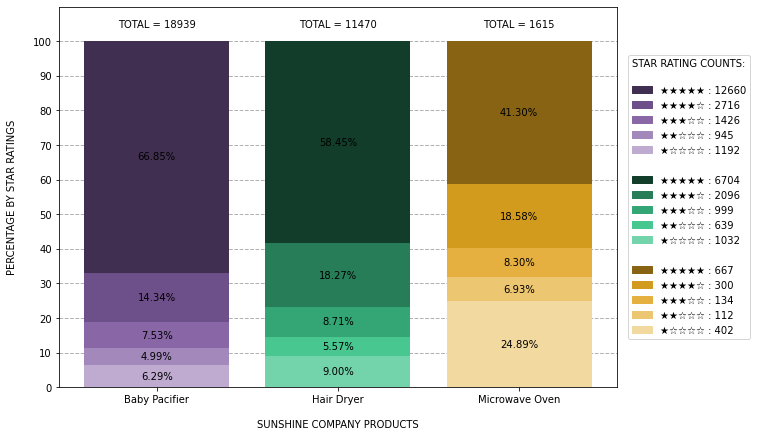

In [15]:
# STAR RATING STACKED BAR PLOT VISUALIZATION
plt.figure(figsize = (10, 7))
plt.grid(color = "black", linestyle = "--", linewidth = 1, axis = "y", alpha = 0.3)
Grid = plt.gca()
Grid.set_axisbelow(True)
plt.bar(x, y1, color = OneStar)
plt.bar(x, y2, bottom = y1, color = TwoStar)
plt.bar(x, y3, bottom = y1 + y2, color = ThreeStar)
plt.bar(x, y4, bottom = y1 + y2 + y3, color = FourStar)
plt.bar(x, y5, bottom = y1 + y2 + y3 + y4, color = FiveStar)
for xpos, ypos, yval in zip(x, y1/2, y1):
    plt.text(xpos, ypos, "%.2f" % yval + "%", ha = "center", va = "center")
for xpos, ypos, yval in zip(x, y1 + y2/2, y2):
    plt.text(xpos, ypos, "%.2f" % yval + "%", ha = "center", va = "center")
for xpos, ypos, yval in zip(x, y1 + y2 + y3/2, y3):
    plt.text(xpos, ypos, "%.2f" % yval + "%", ha = "center", va = "center")
for xpos, ypos, yval in zip(x, y1 + y2 + y3 + y4/2, y4):
    plt.text(xpos, ypos, "%.2f" % yval + "%", ha = "center", va = "center")
for xpos, ypos, yval in zip(x, y1 + y2 + y3 + y4 + y5/2, y5):
    plt.text(xpos, ypos, "%.2f" % yval + "%", ha = "center", va = "center")
for xpos, ypos, yval in zip(x, y1 + y2 + y3 + y4 + y5, ArrayTotal):
    plt.text(xpos, ypos, "TOTAL = %d\n" % yval, ha = "center", va = "bottom")
Labels = ["Baby Pacifier", "Hair Dryer", "Microwave Oven"]
plt.xlabel("\nSUNSHINE COMPANY PRODUCTS")
plt.ylabel("PERCENTAGE BY STAR RATINGS\n")
plt.ylim(0, 110)
plt.yticks(np.arange(0, 110, 10))
plt.xticks(x, Labels)
plt.legend(handles = [BP5, BP4, BP3, BP2, BP1, BP0, HD5, HD4, HD3, HD2, HD1, BP0, MO5, MO4, MO3, MO2, MO1],
           bbox_to_anchor = (1.01, 0.5), title = "STAR RATING COUNTS:\n", loc = "center left")

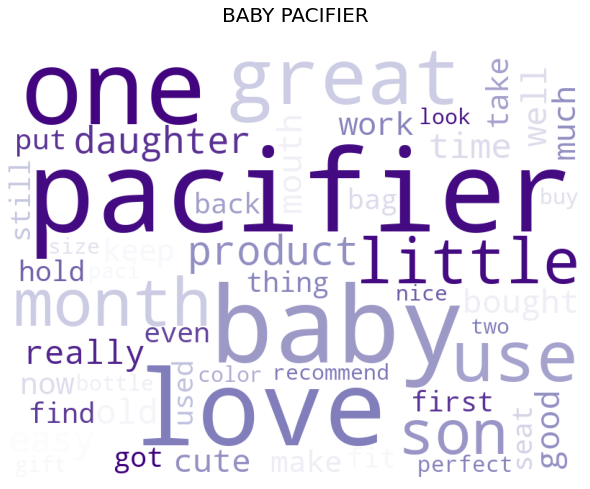

In [16]:
# BABY PACIFIER REVIEWS WORDCLOUD VISUALIZATION
BPCommentWords = ""
BPStopwords = list(STOPWORDS) + ["will"]
BabyPacifier.rename(columns = {"REVIEW BODY": "REVIEWBODY"}, inplace = True)
for val in BabyPacifier.REVIEWBODY:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    BPCommentWords += " ".join(tokens) + " " 
BPWordCloud = WordCloud(width = 800, height = 600, background_color = "white", stopwords = BPStopwords, 
                        min_font_size = 10, max_words = 50, mask = None, colormap = "Purples",
                        random_state = 0, collocations = False).generate(BPCommentWords)                    
BabyPacifier.rename(columns = {"REVIEWBODY": "REVIEW BODY"}, inplace = True)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(BPWordCloud)
plt.axis("off")
plt.title("BABY PACIFIER\n", fontdict = {"fontsize": 20})
plt.tight_layout(pad = 0)
plt.show()

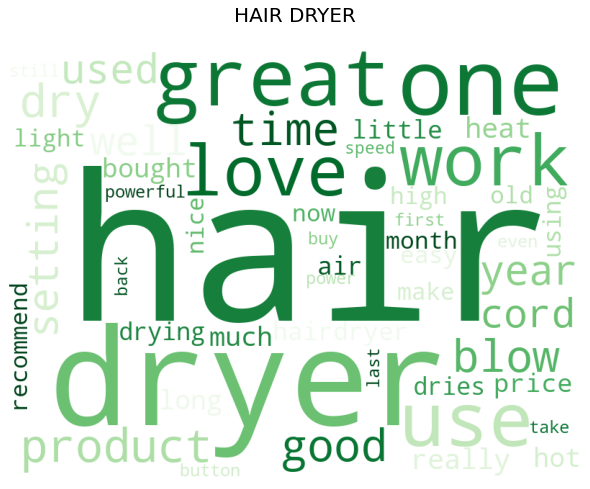

In [17]:
# HAIR DRYER REVIEWS WORDCLOUD VISUALIZATION
HDCommentWords = ""
HDStopwords = list(STOPWORDS) + ["will", "br"]
HairDryer.rename(columns = {"REVIEW BODY": "REVIEWBODY"}, inplace = True)
for val in HairDryer.REVIEWBODY:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    HDCommentWords += " ".join(tokens) + " " 
HDWordCloud = WordCloud(width = 800, height = 600, background_color = "white", stopwords = HDStopwords, 
                        min_font_size = 10, max_words = 50, mask = None, colormap = "Greens",
                        random_state = 4, collocations = False).generate(HDCommentWords)                    
HairDryer.rename(columns = {"REVIEWBODY": "REVIEW BODY"}, inplace = True)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(HDWordCloud)
plt.axis("off")
plt.title("HAIR DRYER\n", fontdict = {"fontsize": 20})
plt.tight_layout(pad = 0)
plt.show()

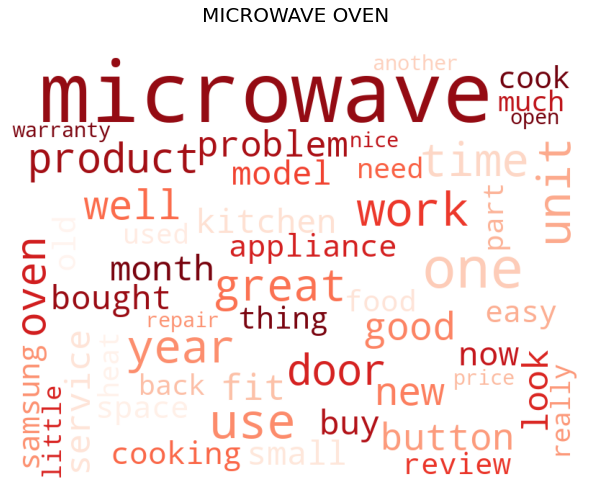

In [18]:
# MICROWAVE OVEN REVIEWS WORDCLOUD VISUALIZATION
MOCommentWords = ""
MOStopwords = list(STOPWORDS) + ["will", "ge"]
MicrowaveOven.rename(columns = {"REVIEW BODY": "REVIEWBODY"}, inplace = True)
for val in MicrowaveOven.REVIEWBODY:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    MOCommentWords += " ".join(tokens) + " " 
MOWordCloud = WordCloud(width = 800, height = 600, background_color = "white", stopwords = MOStopwords, 
                        min_font_size = 10, max_words = 50, mask = None, colormap = "Reds",
                        random_state = 3, collocations = False).generate(MOCommentWords)                    
MicrowaveOven.rename(columns = {"REVIEWBODY": "REVIEW BODY"}, inplace = True)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(MOWordCloud)
plt.axis("off")
plt.title("MICROWAVE OVEN\n", fontdict = {"fontsize": 20})
plt.tight_layout(pad = 0)
plt.show()

In [19]:
# 1-STAR RATING WORD SET
WordSet1Star = DataSet[DataSet['STAR RATING'] == 1]['REVIEW BODY']
WordSetRating1 = pd.DataFrame(WordSet1Star)
WordSetCounter1 = Counter(" ".join(WordSetRating1["REVIEW BODY"].str.lower()).split()).most_common(900)
WordSetDataFrame1 = pd.DataFrame(WordSetCounter1, columns = ["WORDS", "COUNT"])
WordSetDataFrame1.index = WordSetDataFrame1.index + 1
WordSetDataFrame1

,WORDS,COUNT
1,the,9178
2,i,6050
3,it,5129
4,and,4896
5,to,4657
...,...,...
896,month.,21
897,wet,21
898,worked.,21
899,considering,21


In [20]:
# 2-STAR RATING WORD SET
WordSet2Star = DataSet[DataSet['STAR RATING'] == 2]['REVIEW BODY']
WordSetRating2 = pd.DataFrame(WordSet2Star)
WordSetCounter2 = Counter(" ".join(WordSetRating2["REVIEW BODY"].str.lower()).split()).most_common(900)
WordSetDataFrame2 = pd.DataFrame(WordSetCounter2, columns = ["WORDS", "COUNT"])
WordSetDataFrame2.index = WordSetDataFrame2.index + 1
WordSetDataFrame2

,WORDS,COUNT
1,the,6147
2,i,3702
3,it,3407
4,and,3025
5,to,3012
...,...,...
896,moving,14
897,main,14
898,fire,14
899,today,14


In [21]:
# 3-STAR RATING WORD SET
WordSet3Star = DataSet[DataSet['STAR RATING'] == 3]['REVIEW BODY']
WordSetRating3 = pd.DataFrame(WordSet3Star)
WordSetCounter3 = Counter(" ".join(WordSetRating3["REVIEW BODY"].str.lower()).split()).most_common(900)
WordSetDataFrame3 = pd.DataFrame(WordSetCounter3, columns = ["WORDS", "COUNT"])
WordSetDataFrame3.index = WordSetDataFrame3.index + 1
WordSetDataFrame3

,WORDS,COUNT
1,the,8653
2,i,5009
3,it,4579
4,to,4188
5,and,3913
...,...,...
896,nice.,18
897,cute.,18
898,chew,18
899,range,18


In [22]:
# 4-STAR RATING WORD SET
WordSet4Star = DataSet[DataSet['STAR RATING'] == 4]['REVIEW BODY']
WordSetRating4 = pd.DataFrame(WordSet4Star)
WordSetCounter4 = Counter(" ".join(WordSetRating4["REVIEW BODY"].str.lower()).split()).most_common(900)
WordSetDataFrame4 = pd.DataFrame(WordSetCounter4, columns = ["WORDS", "COUNT"])
WordSetDataFrame4.index = WordSetDataFrame4.index + 1
WordSetDataFrame4

,WORDS,COUNT
1,the,15259
2,i,8799
3,it,8411
4,and,7913
5,to,7893
...,...,...
896,handles,33
897,fast.,33
898,"small,",33
899,point,33


In [23]:
# 5-STAR RATING WORD SET
WordSet5Star = DataSet[DataSet['STAR RATING'] == 5]['REVIEW BODY']
WordSetRating5 = pd.DataFrame(WordSet5Star)
WordSetCounter5 = Counter(" ".join(WordSetRating5["REVIEW BODY"].str.lower()).split()).most_common(900)
WordSetDataFrame5 = pd.DataFrame(WordSetCounter5, columns = ["WORDS", "COUNT"])
WordSetDataFrame5.index = WordSetDataFrame5.index + 1
WordSetDataFrame5

,WORDS,COUNT
1,the,39200
2,and,28776
3,i,26288
4,to,22511
5,it,22437
...,...,...
896,one!,96
897,bath,96
898,shipped,96
899,elephant,96


In [24]:
# WORD SET INTERSECTIONS
Set1 = set(WordSetDataFrame1["WORDS"].values.tolist())
Set2 = set(WordSetDataFrame2["WORDS"].values.tolist())
Set3 = set(WordSetDataFrame3["WORDS"].values.tolist())
Set4 = set(WordSetDataFrame4["WORDS"].values.tolist())
Set5 = set(WordSetDataFrame5["WORDS"].values.tolist())
SetIntersection = list(Set1.intersection(Set2, Set3, Set4, Set5))
print(SetIntersection)

['there', 'again.', "wouldn't", 'minutes', 'without', 'head', 'fast', 'low', 'able', 'two', 'however,', 'ended', 'setting', 'home', 'hair,', 'looking', 'diaper', 'definitely', 'months.', 'hand', 'quickly', 'both', '&', 'speed', 'year', '6', 'well', 'used', 'then', 'on', 'fan', 'out.', 'say', 'yet', 'find', 'brush', '30', 'still', 'tried', 'came', 'heavy', 'handle', 'take', 'wish', 'great.', 'cover', 'years.', 'another', 'some', 'want', 'things', 'been', 'huge', 'worth', "i'll", 'while', 'stick', 'her', 'work', 'kept', 'seemed', 'remove', 'he', 'however', 'falls', 'large', 'all,', 'where', 'if', 'car', 'amazon', 'actually', 'even', 'lot', 'difficult', 'picture', 'least', 'weeks', 'love', 'rather', 'others', "can't", 'here', 'mine', 'easy', 'weight', 'travel', 'or', 'old', 'though', 'are', 'up', 'price.', 'in.', 'care', 'real', 'buy', 'went', 'pacifiers.', 'away', 'most', 'shape', 'ago', 'says', 'case', 'has', 'extra', 'blue', 'price', 'fit', 'as', 'pretty', 'size', 'us', 'bit', 'far', '

In [25]:
# WORD SET SUMMARY
warnings.filterwarnings("ignore")
Words = "enough|easy|cheap|almost|great|difficult|different|extreme|least|expensive|happy|exactly|best|cute|suck"
WordSet1 = WordSetDataFrame1[WordSetDataFrame1["WORDS"].str.contains(Words)].sort_values("WORDS", ascending = True)
WordSet2 = WordSetDataFrame2[WordSetDataFrame2["WORDS"].str.contains(Words)].sort_values("WORDS", ascending = True)
WordSet3 = WordSetDataFrame3[WordSetDataFrame3["WORDS"].str.contains(Words)].sort_values("WORDS", ascending = True)
WordSet4 = WordSetDataFrame4[WordSetDataFrame4["WORDS"].str.contains(Words)].sort_values("WORDS", ascending = True)
WordSet5 = WordSetDataFrame5[WordSetDataFrame5["WORDS"].str.contains(Words)].sort_values("WORDS", ascending = True)
Merge1 = pd.merge(WordSet1, WordSet2[['WORDS','COUNT']], on = 'WORDS', how = 'left')
Merge2 = pd.merge(Merge1, WordSet3[['WORDS','COUNT']], on = 'WORDS', how = 'left')
Merge3 = pd.merge(Merge2, WordSet4[['WORDS','COUNT']], on = 'WORDS', how = 'left')
Merge4 = pd.merge(Merge3, WordSet5[['WORDS','COUNT']], on = 'WORDS', how = 'left')
WordSetSummary = Merge4.set_axis(["WORDS", "1-STAR", "2-STAR", "3-STAR", "4-STAR", "5-STAR"], axis = 1, inplace = False)
WordSetSummary["FREQUENCY"] = WordSetSummary[["1-STAR", "2-STAR", "3-STAR", "4-STAR", "5-STAR"]].sum(axis = 1)
WordSetSummary.style.set_precision(0)

,WORDS,1-STAR,2-STAR,3-STAR,4-STAR,5-STAR,FREQUENCY
0,almost,73,52,73,126,397,721
1,best,36,40,55,154,1263,1548
2,cheap,87,55,60,52,153,407
3,cheaper,22,21,29,40,123,235
4,cheaply,34,nan,nan,nan,nan,34
5,cute,42,66,119,176,874,1277
6,different,121,97,120,215,670,1223
7,difficult,55,54,69,105,131,414
8,easy,48,71,154,654,2538,3465
9,enough,89,123,151,259,832,1454


In [26]:
# BABY PACIFIER HELPFULNESS RATING
BPGroup = DataSet[DataSet["PRODUCT CATEGORY"] == "Baby"]
BPHelpfulVotes = BPGroup.groupby(by = "STAR RATING")["HELPFUL VOTES"].sum().to_frame("HELPFUL VOTES")
BPTotalVotes = BPGroup.groupby(by = "STAR RATING")["TOTAL VOTES"].sum().to_frame("TOTAL VOTES")
BPHelpfulVotes["TOTAL VOTES"] = BPTotalVotes["TOTAL VOTES"].tolist()
BPHV = np.array(BPHelpfulVotes["HELPFUL VOTES"].tolist())
BPTV = np.array(BPHelpfulVotes["TOTAL VOTES"].tolist())
Ratio = np.round(BPHV/BPTV*100, decimals = 2)
BPRatio = [f"{i}%" for i in Ratio]
BPHelpfulVotes["RATIO"] = BPRatio
BPHelpfulVotes.T

STAR RATING,1,2,3,4,5
HELPFUL VOTES,2531,1558,1228,2702,7647
TOTAL VOTES,4128,2347,1892,3477,9579
RATIO,61.31%,66.38%,64.9%,77.71%,79.83%


In [27]:
# HAIR DRYER HELPFULNESS RATING
HDGroup = DataSet[DataSet["PRODUCT CATEGORY"] == "Beauty"]
HDHelpfulVotes = HDGroup.groupby(by = "STAR RATING")["HELPFUL VOTES"].sum().to_frame("HELPFUL VOTES")
HDTotalVotes = HDGroup.groupby(by = "STAR RATING")["TOTAL VOTES"].sum().to_frame("TOTAL VOTES")
HDHelpfulVotes["TOTAL VOTES"] = HDTotalVotes["TOTAL VOTES"].tolist()
HDHV = np.array(HDHelpfulVotes["HELPFUL VOTES"].tolist())
HDTV = np.array(HDHelpfulVotes["TOTAL VOTES"].tolist())
Ratio = np.round(HDHV/HDTV*100, decimals = 2)
HDRatio = [f"{i}%" for i in Ratio]
HDHelpfulVotes["RATIO"] = HDRatio
HDHelpfulVotes.T

STAR RATING,1,2,3,4,5
HELPFUL VOTES,4721,1341,2269,4049,12614
TOTAL VOTES,6035,1727,2817,4643,14179
RATIO,78.23%,77.65%,80.55%,87.21%,88.96%


In [28]:
# MICROWAVE OVEN HELPFULNESS RATING
MOGroup = DataSet[DataSet["PRODUCT CATEGORY"] == "Major Appliances"]
MOHelpfulVotes = MOGroup.groupby(by = "STAR RATING")["HELPFUL VOTES"].sum().to_frame("HELPFUL VOTES")
MOTotalVotes = MOGroup.groupby(by = "STAR RATING")["TOTAL VOTES"].sum().to_frame("TOTAL VOTES")
MOHelpfulVotes["TOTAL VOTES"] = MOTotalVotes["TOTAL VOTES"].tolist()
MOHV = np.array(MOHelpfulVotes["HELPFUL VOTES"].tolist())
MOTV = np.array(MOHelpfulVotes["TOTAL VOTES"].tolist())
Ratio = np.round(MOHV/MOTV*100, decimals = 2)
MORatio = [f"{i}%" for i in Ratio]
MOHelpfulVotes["RATIO"] = MORatio
MOHelpfulVotes.T

STAR RATING,1,2,3,4,5
HELPFUL VOTES,2258,407,876,1283,4255
TOTAL VOTES,2823,581,1099,1552,4716
RATIO,79.99%,70.05%,79.71%,82.67%,90.22%


In [29]:
# BABY PACIFIER SENTIMENT INTENSITY ANALYZER
BabyPacifierSentiment = {}
for i, row in tqdm(BabyPacifier.iterrows(), total = len(BabyPacifier)):
    Reviews = row["REVIEW BODY"]
    ID = row["CUSTOMER ID"]
    BabyPacifierSentiment[ID] = SentimentIntensityAnalyzer().polarity_scores(Reviews)
BPSentiment = pd.DataFrame(BabyPacifierSentiment).T
BPSentiment = BPSentiment.reset_index().rename(columns = {"index": "CUSTOMER ID"})
BPSentiment = BPSentiment.merge(BabyPacifier, how = "left")
BPSentiment.index = BPSentiment.index + 1
BPSentiment[["neg", "neu", "pos", "STAR RATING"]]

  0%|          | 0/18939 [00:00<?, ?it/s]

,neg,neu,pos,STAR RATING
1,0.000,0.548,0.452,5
2,0.000,0.587,0.413,5
3,0.000,0.778,0.222,5
4,0.000,0.000,1.000,5
5,0.000,0.000,1.000,5
...,...,...,...,...
18935,0.000,0.807,0.193,2
18936,0.095,0.781,0.124,4
18937,0.000,0.576,0.424,5
18938,0.063,0.754,0.183,1


In [30]:
# HAIR DRYER SENTIMENT INTENSITY ANALYZER
HairDryerSentiment = {}
for i, row in tqdm(HairDryer.iterrows(), total = len(HairDryer)):
    HDReviews = row["REVIEW BODY"]
    HDID = row["CUSTOMER ID"]
    HairDryerSentiment[HDID] = SentimentIntensityAnalyzer().polarity_scores(HDReviews)
HDSentiment = pd.DataFrame(HairDryerSentiment).T
HDSentiment = HDSentiment.reset_index().rename(columns = {"index": "CUSTOMER ID"})
HDSentiment = HDSentiment.merge(HairDryer, how = "left")
HDSentiment.index = HDSentiment.index + 1
HDSentiment[["neg", "neu", "pos", "STAR RATING"]]

  0%|          | 0/11470 [00:00<?, ?it/s]

,neg,neu,pos,STAR RATING
1,0.000,0.185,0.815,5
2,0.000,0.777,0.223,4
3,0.000,0.308,0.692,5
4,0.000,1.000,0.000,5
5,0.000,0.562,0.438,4
...,...,...,...,...
11466,0.000,0.841,0.159,5
11467,0.033,0.919,0.048,1
11468,0.050,0.715,0.235,5
11469,0.023,0.886,0.091,5


In [31]:
# MICROWAVE OVEN SENTIMENT INTENSITY ANALYZER
MicrowaveOvenSentiment = {}
for i, row in tqdm(MicrowaveOven.iterrows(), total = len(MicrowaveOven)):
    MOReviews = row["REVIEW BODY"]
    MOID = row["CUSTOMER ID"]
    MicrowaveOvenSentiment[MOID] = SentimentIntensityAnalyzer().polarity_scores(MOReviews)
MOSentiment = pd.DataFrame(MicrowaveOvenSentiment).T
MOSentiment = MOSentiment.reset_index().rename(columns = {"index": "CUSTOMER ID"})
MOSentiment = MOSentiment.merge(MicrowaveOven, how = "left")
MOSentiment.index = MOSentiment.index + 1
MOSentiment[["neg", "neu", "pos", "STAR RATING"]]

  0%|          | 0/1615 [00:00<?, ?it/s]

,neg,neu,pos,STAR RATING
1,0.153,0.847,0.000,1
2,0.058,0.838,0.104,5
3,0.000,0.287,0.713,4
4,0.250,0.750,0.000,3
5,0.000,1.000,0.000,4
...,...,...,...,...
1611,0.036,0.876,0.088,2
1612,0.089,0.885,0.026,3
1613,0.080,0.824,0.097,4
1614,0.077,0.810,0.113,3


In [33]:
# SENTIMENT INTENSITY ANALYZER EXCEL SHEET
BPSentiment[["neg", "neu", "pos", "STAR RATING"]].to_excel("BPSentiment.xlsx")
HDSentiment[["neg", "neu", "pos", "STAR RATING"]].to_excel("HDSentiment.xlsx")
MOSentiment[["neg", "neu", "pos", "STAR RATING"]].to_excel("MOSentiment.xlsx")  

In [105]:
# TIME-SERIES DATAFRAME
BPSeries = BabyPacifier["REVIEW DATE"].unique()
HDSeries = HairDryer["REVIEW DATE"].unique()
MOSeries = MicrowaveOven["REVIEW DATE"].unique()
BPSet = set(BPSeries.tolist())
HDSet = set(HDSeries.tolist())
MOSet = set(MOSeries.tolist())
SeriesIntersection = list(HDSet.intersection(BPSet, MOSet))
DateIntersections = pd.DataFrame(SeriesIntersection, columns = ["DATE INTERSECTIONS"])
DateIntersections.sort_values(by = "DATE INTERSECTIONS", ascending = False)
DateIntersections.to_excel("DateIntersections.xlsx")
TimeSeriesDataFrame = pd.read_csv("TimeSeriesAnalysis.csv")
TimeSeriesDataFrame.index = TimeSeriesDataFrame.index + 1
TimeSeriesDataFrame

,REVIEW DATE,BABY PACIFIER,HAIR DRYER,MICROWAVE OVEN
1,2007-07-28,1,3,1
2,2007-12-31,1,1,1
3,2008-10-08,1,1,1
4,2009-04-29,1,2,1
5,2009-12-05,1,3,1
...,...,...,...,...
761,2015-08-27,19,10,3
762,2015-08-28,33,8,2
763,2015-08-29,9,10,2
764,2015-08-30,45,8,1


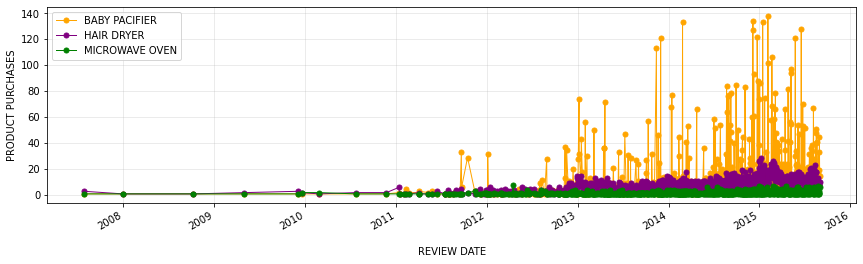

In [170]:
# COMBINED TIME-SERIES VISUALIZATION
ColorPalette = ["orange", "purple", "green"]
TimeSeriesDataFrame["REVIEW DATE"] = pd.to_datetime(TimeSeriesDataFrame["REVIEW DATE"])
TimeSeries = TimeSeriesDataFrame.plot("REVIEW DATE", figsize = (14.5, 4), marker = "o", color = ColorPalette, lw = 1, ms = 5)
plt.xlabel("\nREVIEW DATE")
plt.ylabel("PRODUCT PURCHASES")
plt.grid(alpha = 0.3)

Text(0, 0.5, 'PRODUCT PURCHASES\n')

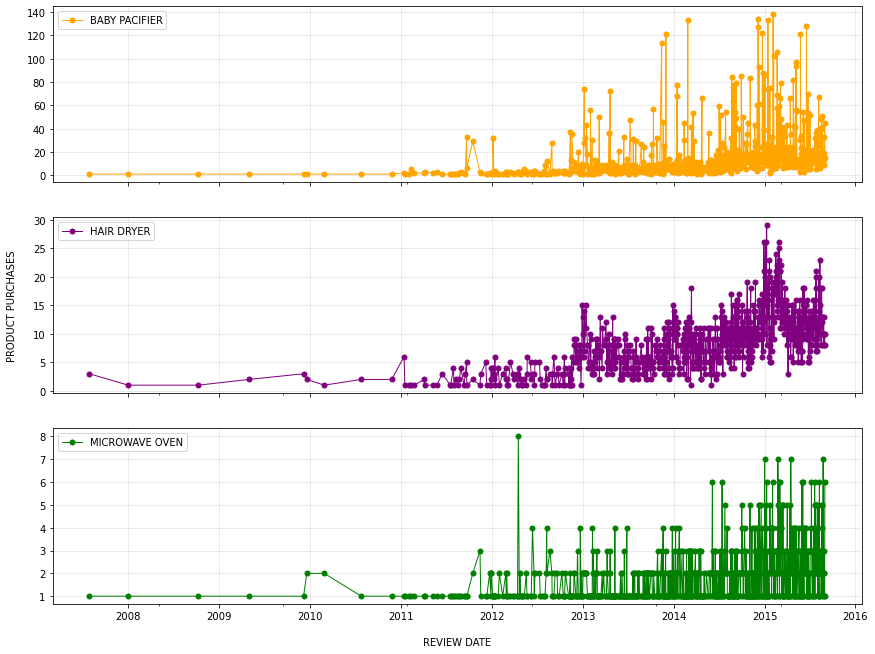

In [169]:
# INDIVIDUAL TIME-SERIES VISUALIZATION
DataFrame = TimeSeriesDataFrame.set_index("REVIEW DATE")
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize = (14.5, 11), sharex = True)
DataFrame.plot(subplots = True, ax = (ax1, ax2, ax3), marker = 'o', linewidth = 1, markersize = 5, color = ColorPalette)
ax1.grid(alpha = 0.3)
ax2.grid(alpha = 0.3)
ax3.grid(alpha = 0.3)
ax1.legend(loc = "upper left")
ax2.legend(loc = "upper left")
ax3.legend(loc = "upper left")
plt.xlabel("\nREVIEW DATE")
ax2.set_ylabel("PRODUCT PURCHASES\n")

Text(0.5, 0, '\nREVIEW DATE')

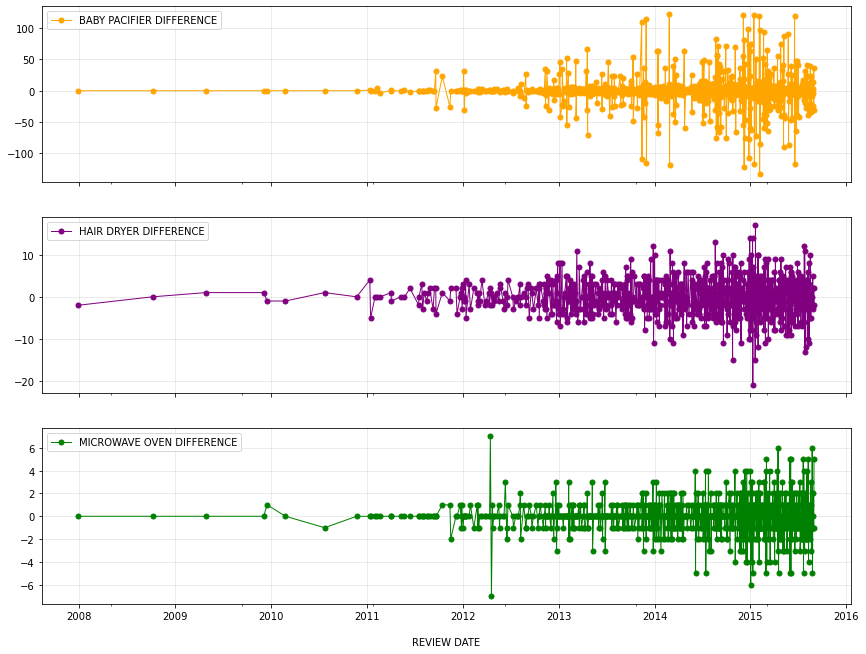

In [179]:
# TIME-SERIES DIFFERENCING
DataFrame["BABY PACIFIER DIFFERENCE"] = DataFrame["BABY PACIFIER"].diff()
DataFrame["HAIR DRYER DIFFERENCE"] = DataFrame["HAIR DRYER"].diff()
DataFrame["MICROWAVE OVEN DIFFERENCE"] = DataFrame["MICROWAVE OVEN"].diff()
Frame = ["BABY PACIFIER DIFFERENCE", "HAIR DRYER DIFFERENCE", "MICROWAVE OVEN DIFFERENCE"]
fig2, (ax11, ax22, ax33) = plt.subplots(3, 1, figsize = (14.5, 11), sharex = True)
DataFrame[Frame].plot(subplots = True, ax = (ax11, ax22, ax33), marker = 'o', linewidth = 1, markersize = 5,
                      color = ColorPalette)
ax11.grid(alpha = 0.3)
ax22.grid(alpha = 0.3)
ax33.grid(alpha = 0.3)
ax11.legend(loc = "upper left")
ax22.legend(loc = "upper left")
ax33.legend(loc = "upper left")
plt.xlabel("\nREVIEW DATE")

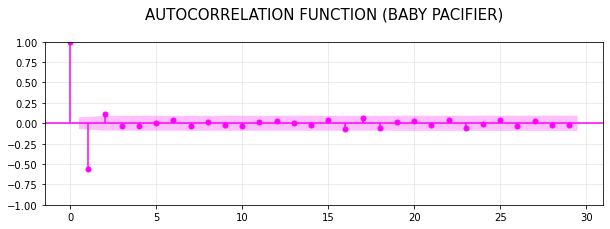

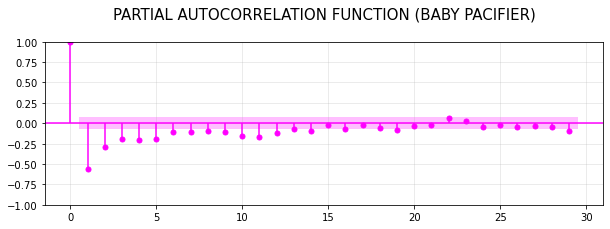

In [206]:
# BABY PACIFIER CORRELOGRAM ANALYSIS
figBP, BPdimensions = plt.subplots(figsize = (10, 3), sharey = True)
pyplot.grid(True, alpha = 0.3)
plot_acf(DataFrame["BABY PACIFIER DIFFERENCE"].dropna(), color = "fuchsia", ax = BPdimensions,
         vlines_kwargs = {"colors": "fuchsia"})
plt.title("AUTOCORRELATION FUNCTION (BABY PACIFIER)\n", fontsize = 15)
for item in BPdimensions.collections:
    if type(item) == PolyCollection:
        item.set_facecolor("fuchsia")
figBP, BPdimensions = plt.subplots(figsize = (10, 3),  sharey = True)
pyplot.grid(True, alpha = 0.3)
plot_pacf(DataFrame["BABY PACIFIER DIFFERENCE"].dropna(), color = "fuchsia", ax = BPdimensions,
          vlines_kwargs = {"colors": "fuchsia"})
plt.title("PARTIAL AUTOCORRELATION FUNCTION (BABY PACIFIER)\n", fontsize = 15)
for item in BPdimensions.collections:
    if type(item) == PolyCollection:
        item.set_facecolor("fuchsia")

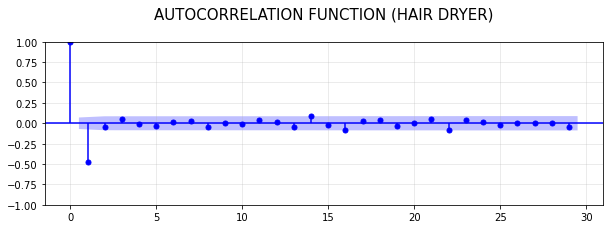

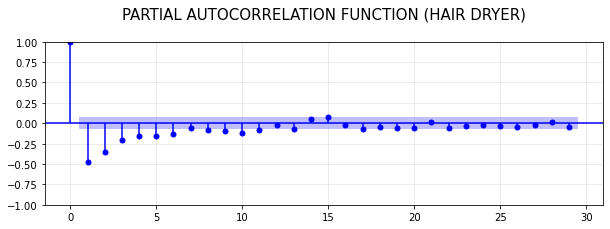

In [207]:
# HAIR DRYER CORRELOGRAM ANALYSIS
figHD, HDdimensions = plt.subplots(figsize = (10, 3), sharey = True)
pyplot.grid(True, alpha = 0.3)
plot_acf(DataFrame["HAIR DRYER DIFFERENCE"].dropna(), color = "blue", ax = HDdimensions,
         vlines_kwargs = {"colors": "blue"})
plt.title("AUTOCORRELATION FUNCTION (HAIR DRYER)\n", fontsize = 15)
for item in HDdimensions.collections:
    if type(item) == PolyCollection:
        item.set_facecolor("blue")
figHD, HDdimensions = plt.subplots(figsize = (10, 3),  sharey = True)
pyplot.grid(True, alpha = 0.3)
plot_pacf(DataFrame["HAIR DRYER DIFFERENCE"].dropna(), color = "blue", ax = HDdimensions,
          vlines_kwargs = {"colors": "blue"})
plt.title("PARTIAL AUTOCORRELATION FUNCTION (HAIR DRYER)\n", fontsize = 15)
for item in HDdimensions.collections:
    if type(item) == PolyCollection:
        item.set_facecolor("blue")

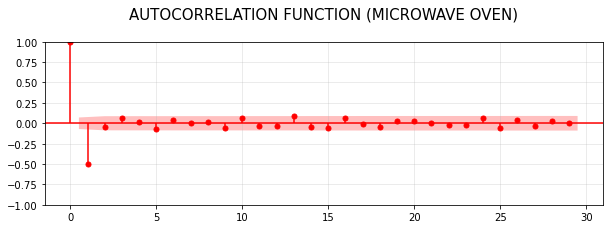

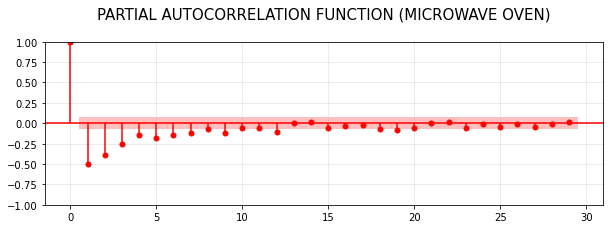

In [208]:
# MICROWAVE OVEN CORRELOGRAM ANALYSIS
figMO, MOdimensions = plt.subplots(figsize = (10, 3), sharey = True)
pyplot.grid(True, alpha = 0.3)
plot_acf(DataFrame["MICROWAVE OVEN DIFFERENCE"].dropna(), color = "red", ax = MOdimensions,
         vlines_kwargs = {"colors": "red"})
plt.title("AUTOCORRELATION FUNCTION (MICROWAVE OVEN)\n", fontsize = 15)
for item in MOdimensions.collections:
    if type(item) == PolyCollection:
        item.set_facecolor("red")
figMO, MOdimensions = plt.subplots(figsize = (10, 3),  sharey = True)
pyplot.grid(True, alpha = 0.3)
plot_pacf(DataFrame["MICROWAVE OVEN DIFFERENCE"].dropna(), color = "red", ax = MOdimensions,
          vlines_kwargs = {"colors": "red"})
plt.title("PARTIAL AUTOCORRELATION FUNCTION (MICROWAVE OVEN)\n", fontsize = 15)
for item in MOdimensions.collections:
    if type(item) == PolyCollection:
        item.set_facecolor("red")

In [213]:
# BABY PACIFIER MODEL FITTING
StepwiseFit = auto_arima(TimeSeriesDataFrame["BABY PACIFIER"], trace = True, suppress_warnings = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6765.642, Time=2.73 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7294.448, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7006.034, Time=0.42 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6768.229, Time=0.70 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7292.448, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=6768.784, Time=1.42 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=6763.649, Time=2.35 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6769.595, Time=0.87 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=6941.246, Time=0.38 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=6765.635, Time=1.96 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=6916.122, Time=0.53 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=6767.544, Time=1.21 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=6763.448, Time=0.50 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=6769.037, Time=0.29 sec
 ARIMA(2,1,0)(0,0,0)[0]          

In [214]:
# HAIR DRYER MODEL FITTING
StepwiseFit = auto_arima(TimeSeriesDataFrame["HAIR DRYER"], trace = True, suppress_warnings = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4056.539, Time=3.40 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4451.062, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4255.180, Time=0.37 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4051.652, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4449.065, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4052.923, Time=0.72 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=4052.928, Time=0.51 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4054.560, Time=1.70 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=4050.062, Time=0.17 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=4051.399, Time=0.19 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=4051.401, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=4253.189, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=4053.003, Time=0.70 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 8.719 seconds


In [215]:
# MICROWAVE OVEN MODEL FITTING
StepwiseFit = auto_arima(TimeSeriesDataFrame["MICROWAVE OVEN"], trace = True, suppress_warnings = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2375.210, Time=2.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2910.780, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2692.375, Time=0.28 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2370.616, Time=1.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2908.792, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2371.273, Time=0.98 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2371.165, Time=1.31 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2374.496, Time=0.94 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2373.297, Time=0.17 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 7.140 seconds


In [221]:
# TRAINING THE MODEL FIT
TrainData = TimeSeriesDataFrame.iloc[:-10]
TestData = TimeSeriesDataFrame.iloc[-10:]
print("TRAIN DATA:", TrainData.shape, "\n", "TEST DATA:", TestData.shape)

TRAIN DATA: (755, 7) 
 TEST DATA: (10, 7)


In [224]:
# BABY PACIFIER ARIMA MODEL
BPARIMAmodel = ARIMA(TrainData["BABY PACIFIER"], order = (2,1,1))
BPARIMAmodel = BPARIMAmodel.fit()
BPARIMAmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          BABY PACIFIER   No. Observations:                  755
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -3337.170
Date:                Fri, 03 Feb 2023   AIC                           6682.340
Time:                        20:48:48   BIC                           6700.842
Sample:                             0   HQIC                          6689.468
                                - 755                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0216      0.028     -0.782      0.434      -0.076       0.033
ar.L2          0.1019      0.026      3.870      0.000       0.050       0.153
ma.L1         -0.9730      0.009   -110.741      0.000      -0.990      -0.956
sigma2       407.6229      8.767     46.495      0.000     390.440     424.806
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              4597.05
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               6.18   Skew:                             2.90
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [226]:
# HAIR DRYER ARIMA MODEL
HDARIMAmodel = ARIMA(TrainData["HAIR DRYER"], order = (0,1,1))
HDARIMAmodel = HDARIMAmodel.fit()
HDARIMAmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             HAIR DRYER   No. Observations:                  755
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -1998.128
Date:                Fri, 03 Feb 2023   AIC                           4000.255
Time:                        21:58:40   BIC                           4009.506
Sample:                             0   HQIC                          4003.819
                                - 755                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8603      0.016    -54.683      0.000      -0.891      -0.829
sigma2        11.7095      0.516     22.684      0.000      10.698      12.721
===================================================================================
Ljung-Box (L1) (Q):                   0.34   Jarque-Bera (JB):                25.20
Prob(Q):                              0.56   Prob(JB):                         0.00
Heteroskedasticity (H):               3.19   Skew:                             0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [227]:
# MICROWAVE OVEN ARIMA MODEL
MOARIMAmodel = ARIMA(TrainData["MICROWAVE OVEN"], order = (0,1,1))
MOARIMAmodel = MOARIMAmodel.fit()
MOARIMAmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         MICROWAVE OVEN   No. Observations:                  755
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -1158.046
Date:                Fri, 03 Feb 2023   AIC                           2320.091
Time:                        22:07:05   BIC                           2329.342
Sample:                             0   HQIC                          2323.655
                                - 755                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9700      0.008   -124.418      0.000      -0.985      -0.955
sigma2         1.2587      0.040     31.808      0.000       1.181       1.336
===================================================================================
Ljung-Box (L1) (Q):                   1.31   Jarque-Bera (JB):               598.74
Prob(Q):                              0.25   Prob(JB):                         0.00
Heteroskedasticity (H):               3.63   Skew:                             1.42
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [259]:
# BABY PACIFIER MODEL ACCURACY TEST
BPPredictionAccuracy = BPARIMAmodel.predict(start = len(TrainData) + 1, end = len(TrainData) + len(TestData))
BPMAPEvalue = mean_absolute_percentage_error(TestData["BABY PACIFIER"], BPPredictionAccuracy)
BPMAPE = "{:.2%}".format(BPMAPEvalue*0.1)
print("MEAN ABSOLUTE PERCENTAGE ERROR (BABY PACIFIER):", BPMAPE)

MEAN ABSOLUTE PERCENTAGE ERROR (BABY PACIFIER): 5.57%


In [260]:
# HAIR DRYER MODEL ACCURACY TEST
HDPredictionAccuracy = HDARIMAmodel.predict(start = len(TrainData) + 1, end = len(TrainData) + len(TestData))
HDMAPEvalue = mean_absolute_percentage_error(TestData["HAIR DRYER"], HDPredictionAccuracy)
HDMAPE = "{:.2%}".format(HDMAPEvalue*0.1)
print("MEAN ABSOLUTE PERCENTAGE ERROR (HAIR DRYER):", HDMAPE)

MEAN ABSOLUTE PERCENTAGE ERROR (HAIR DRYER): 4.36%


In [258]:
# MICROWAVE OVEN MODEL ACCURACY TEST
MOPredictionAccuracy = MOARIMAmodel.predict(start = len(TrainData) + 1, end = len(TrainData) + len(TestData))
MOMAPEvalue = mean_absolute_percentage_error(TestData["HAIR DRYER"], MOPredictionAccuracy)
MOMAPE = "{:.2%}".format(MOMAPEvalue*0.1)
print("MEAN ABSOLUTE PERCENTAGE ERROR (MICROWAVE OVEN):", MOMAPE)

MEAN ABSOLUTE PERCENTAGE ERROR (MICROWAVE OVEN): 7.09%


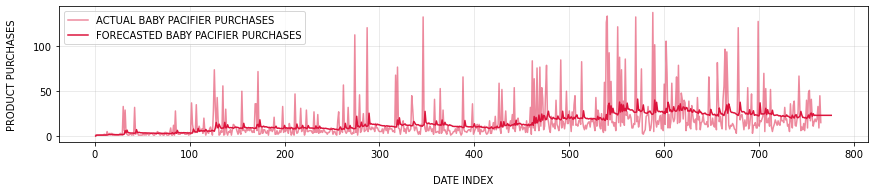

In [293]:
# BABY PACIFIER ARIMA FORECAST VISUALIZATION
BPTotalForecast = BPARIMAmodel.predict(start = len(TimeSeriesDataFrame) - 765, end = len(TimeSeriesDataFrame) + 10)
plt.plot(TimeSeriesDataFrame["BABY PACIFIER"], color = "crimson", label = "ACTUAL BABY PACIFIER PURCHASES", alpha = 0.5)
BPFuturePrediction = BPTotalForecast.plot(figsize = (14.5, 2.5), color = "crimson", label = "FORECASTED BABY PACIFIER PURCHASES")
plt.legend(loc = "upper left")
BPFuturePrediction.set_xlabel("\nDATE INDEX")
BPFuturePrediction.set_ylabel("PRODUCT PURCHASES\n")
BPFuturePrediction.grid(True, alpha = 0.3)

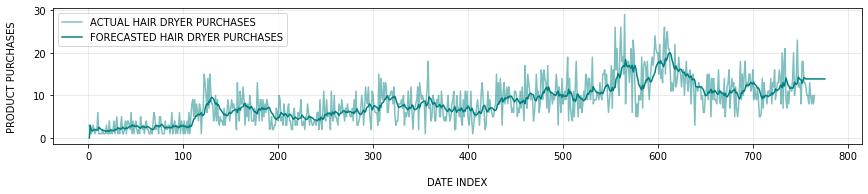

In [294]:
# HAIR DRYER ARIMA FORECAST VISUALIZATION
HDTotalForecast = HDARIMAmodel.predict(start = len(TimeSeriesDataFrame) - 765, end = len(TimeSeriesDataFrame) + 10)
plt.plot(TimeSeriesDataFrame["HAIR DRYER"], color = "teal", label = "ACTUAL HAIR DRYER PURCHASES", alpha = 0.5)
HDFuturePrediction = HDTotalForecast.plot(figsize = (14.5, 2.5), color = "teal", label = "FORECASTED HAIR DRYER PURCHASES")
plt.legend(loc = "upper left")
HDFuturePrediction.set_xlabel("\nDATE INDEX")
HDFuturePrediction.set_ylabel("PRODUCT PURCHASES\n")
HDFuturePrediction.grid(True, alpha = 0.3)

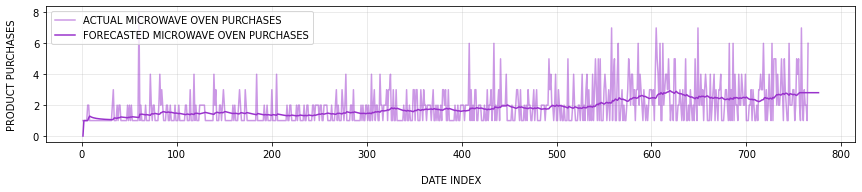

In [295]:
# MICROWAVE OVEN ARIMA FORECAST VISUALIZATION
MOTotalForecast = MOARIMAmodel.predict(start = len(TimeSeriesDataFrame) - 765, end = len(TimeSeriesDataFrame) + 10)
plt.plot(TimeSeriesDataFrame["MICROWAVE OVEN"], color = "darkorchid", label = "ACTUAL MICROWAVE OVEN PURCHASES", alpha = 0.5)
MOFuturePrediction = MOTotalForecast.plot(figsize = (14.5, 2.5), color = "darkorchid", label = "FORECASTED MICROWAVE OVEN PURCHASES")
plt.legend(loc = "upper left")
MOFuturePrediction.set_xlabel("\nDATE INDEX")
MOFuturePrediction.set_ylabel("PRODUCT PURCHASES\n")
MOFuturePrediction.grid(True, alpha = 0.3)

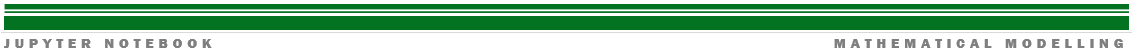